<a href="https://colab.research.google.com/github/kebabee/Machine-Learning/blob/main/polynomial_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 California housing data


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

housing = fetch_california_housing()
X = housing.data
Y = housing.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, Y.shape)
print(housing.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Median Income, House Age, Average Rooms, Average Bedrooms, Population, Average Occupants (average number of household members), Latitude, Longitude

A test for degree = 2

In [5]:
poly2 = PolynomialFeatures(degree=2)
X_poly2_train = poly2.fit_transform(X_train)
X_poly2_test = poly2.transform(X_test)

model2=LinearRegression()
model2.fit(X_poly2_train, Y_train)
test2_predictions = model2.predict(X_poly2_test)

print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, test2_predictions)))
print("R2 Score:", r2_score(Y_test, test2_predictions))

np.mean(Y_test), np.median(Y_test), np.min(Y_test), np.max(Y_test)

Test RMSE: 0.6813967463413494
R2 Score: 0.6456819713278688


(2.0550030959302323, 1.7865, 0.14999, 5.00001)

In [6]:
X_poly2_train.shape

(16512, 45)

So we now actually have 45 features.

In [7]:
model2.coef_

array([ 6.02531539e-08, -1.19367676e+01, -8.42630146e-01,  7.88415381e+00,
       -3.83231200e+01, -2.27731139e-04,  1.01743127e+00,  8.28463988e+00,
        5.70979224e+00, -3.09492552e-02,  1.57708009e-03,  3.95472134e-02,
       -1.45652809e-01,  5.14650357e-05, -4.48293709e-03, -1.63991940e-01,
       -1.53482711e-01,  2.09625937e-04, -5.40026171e-04,  9.58827655e-03,
        2.51416583e-06, -1.90982874e-03, -1.02793717e-02, -1.00025865e-02,
        1.05983833e-02, -1.05963888e-01, -5.70066790e-05,  2.09081102e-02,
        1.06559793e-01,  1.00057435e-01,  2.64008851e-01,  4.91513585e-04,
       -8.00859252e-02, -5.28062567e-01, -4.86723992e-01,  1.50970614e-09,
        2.45816957e-05,  1.35016821e-05,  6.68289252e-06,  5.73953563e-05,
        2.04850532e-02,  1.58102369e-02,  5.76573974e-02,  1.01543054e-01,
        3.80409894e-02])

It's important to understand why 45:

We have $n = 8$ features, and polynomial degree $d = 2$. The total possible cominations is $(n+d)!/n!d!$

$$(8+2)!/2!8! = 10*9/2 = 45$$

It takes all original $X$ terms, then all intersection terms $X_1*X_2$, $X_1*X_3$ etc. and then also all square terms, $X_1*X_1 = X_1^2$, $X_2*X_2 = X_2^2$ etc.

performance on the overall set:

Train RMSE: 0.6486344233521347
2.068558169089147 1.797 0.14999 5.00001


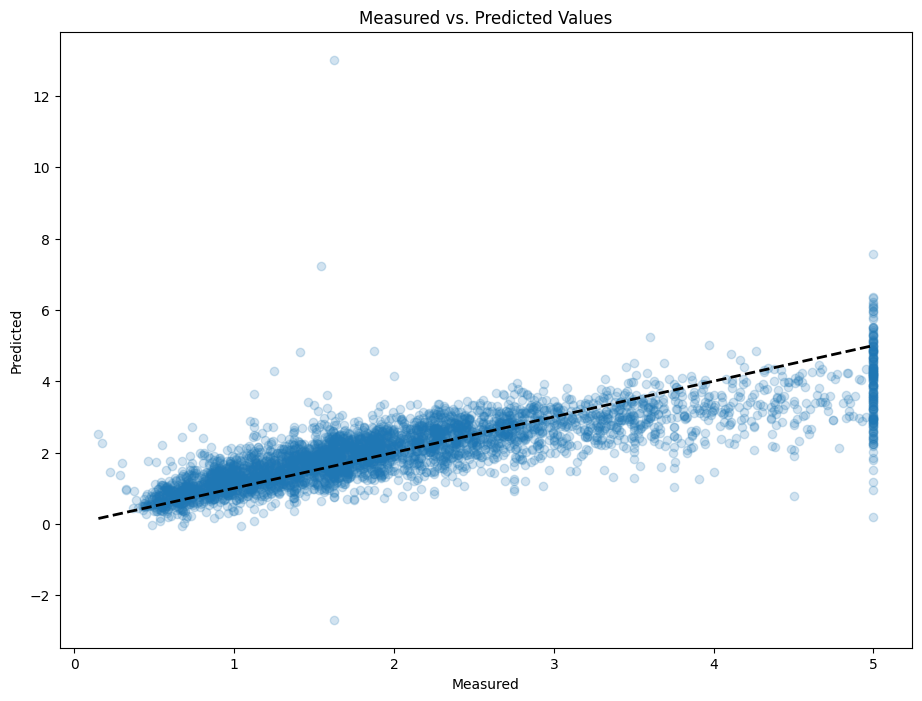

In [12]:
train2_predictions = model2.predict(X_poly2_train)
print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, train2_predictions)))
print(np.mean(Y), np.median(Y), np.min(Y), np.max(Y))

import matplotlib.pyplot as plt
plt.figure(figsize=(11, 8))
plt.scatter(Y_test, test2_predictions, alpha=0.2)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # I am also adding a black reference line
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted Values')
plt.show()

other polynomial degrees:

In [13]:
poly3 = PolynomialFeatures(degree=3)
X_poly3_train = poly3.fit_transform(X_train)
X_poly3_test = poly3.transform(X_test)
model3=LinearRegression()
model3.fit(X_poly3_train, Y_train)

train3_predictions = model3.predict(X_poly3_train)
test3_predictions = model3.predict(X_poly3_test)
print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, train3_predictions)))
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, test3_predictions)))

Train RMSE: 0.5853844742640958
Test RMSE: 4.909764276480704


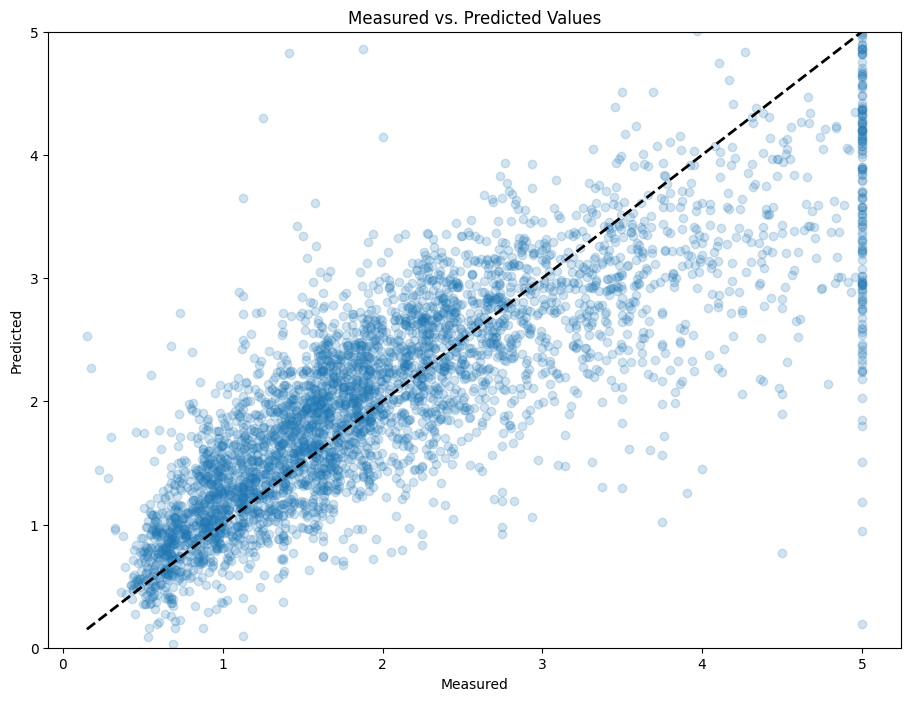

In [16]:
plt.figure(figsize=(11, 8))
plt.scatter(Y_test, test2_predictions, alpha=0.2)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.ylim(0,5)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted Values')
plt.show()

Also, significantly better performance on train set and much worse on test => Overfitting

In [18]:
poly5 = PolynomialFeatures(degree=5)
X_poly5_train = poly5.fit_transform(X_train)
X_poly5_test = poly5.transform(X_test)
model5=LinearRegression()
model5.fit(X_poly5_train, Y_train)

train5_predictions = model5.predict(X_poly5_train)
test5_predictions = model5.predict(X_poly5_test)
print("Train RMSE:", np.sqrt(mean_squared_error(Y_train, train5_predictions)))
print("Test RMSE:", np.sqrt(mean_squared_error(Y_test, test5_predictions)))

Train RMSE: 0.6579503651312452
Test RMSE: 212.21150149075788


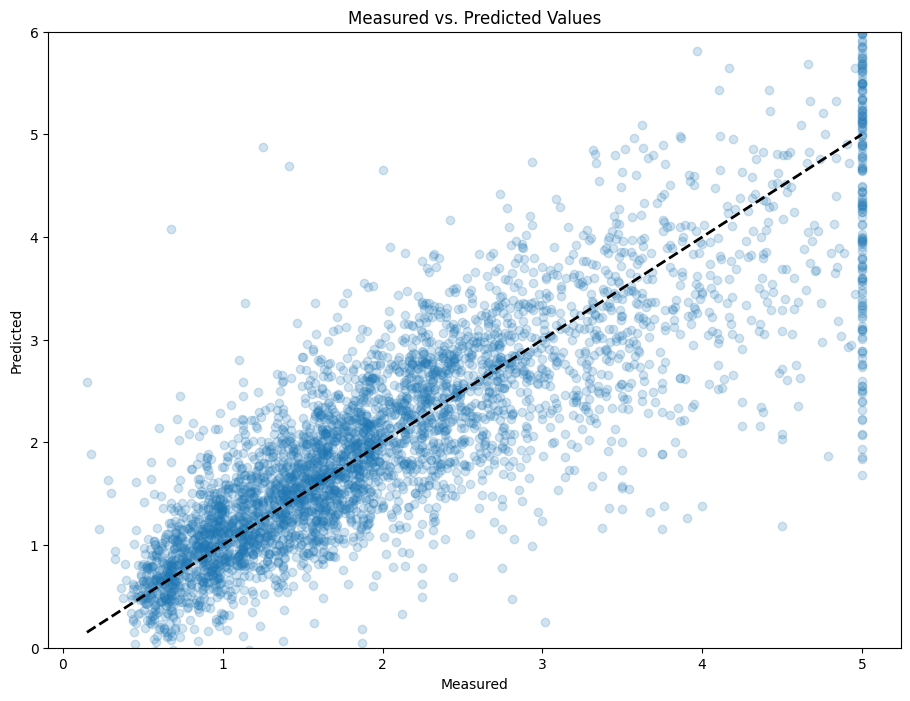

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 8))
plt.scatter(Y_test, test5_predictions, alpha=0.2)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # I am also adding a black reference line
plt.ylim(0,6)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted Values')
plt.show()

All in all these are the results:


1. Standard LR:
* Train RMSE: 0.7196757085831575
* Test RMSE: 0.7455813830127749
* R2 Score Train: 0.6125511913966952
* R2 Score Test: 0.5757877060324524

2. Introduction of Poly d=2
* Train RMSE: 0.6486344233521347
* R2 Score on Train: 0.6852681982344948
* Test RMSE: 0.6813967463413494
* R2 Score: 0.6456819713278688

3. Poly d=3
* Train RMSE: 0.5853844742640958
* Test RMSE: 4.909764276480704
* R2 Score Train: 0.7436560682338298
* R2 Score Test: -17.395619727030436

4. Poly d=5
* Train RMSE: 0.6579503651312452
* Test RMSE: 212.21150149075788
* R2 Score Train: 0.6761626729411938
* R2 Score Test: -34365.157522375535